In [1]:
import torch.nn.functional as Fun
import torch
from torch import nn
import torchvision.transforms as transforms
import numpy as np
torch.manual_seed(100)

from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import os
import pandas as pd
from PIL import Image
from torch.utils.data import (
    Dataset,
    DataLoader,
)

In [24]:
class PizzaDataset(Dataset):
    def __init__(self, csv_file, root, transform=None):
        self.labels = pd.read_csv(csv_file)
        self.root = root
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, index):
        #print(self.root, self.labels.iloc[index, 1])
        img_path = os.path.join(self.root, self.labels.iloc[index, 1])
        img_path = os.path.join(self.root, img_path)
        image = Image.open(img_path)
        y_label = torch.tensor(int(self.labels.iloc[index, 2]))

        if self.transform:
            image = self.transform(image)

        return (image, y_label)

In [25]:
training_data = PizzaDataset(
    csv_file="train.csv",
    root="train_196",
    transform=transforms.ToTensor(),
)

test_data = PizzaDataset(
    csv_file="labels.csv",
    root="test_196",
    transform=transforms.ToTensor(),
)

In [26]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

['альфредо', 'баварская', 'вегетарианская', 'ветчинаибекон', 'ветчинаигрибы', 'гавайская', 'грушаbbq', 'капричиоза', 'клубникаизефир', 'крем-чизсгрибами', 'любимаядедамороза', 'любимаякарбонара', 'любимаяпапинапицца', 'маленькаяиталия', 'маргарита', 'мексиканская', 'миксгрин', 'мясная', 'мясноебарбекю', 'новогодняя', 'палочки', 'папамикс', 'пепперони', 'пепперонигрин', 'пицца8сыровnew', 'постная', 'рождественская', 'сананасомибеконом', 'сгрушейибеконом', 'сгрушейиголубымсыром', 'сердцепепперони-4сыра', 'сердцецыпленокбарбекю-пепперони', 'сливочнаяскреветками', 'суперпапа', 'сырная', 'томатнаяскреветками', 'улыбка', 'цыпленокбарбекю', 'цыпленокгрин', 'цыпленоккордонблю', 'цыпленокрэнч', 'цыпленокфлорентина', 'чеддермексикан', 'чеддерчизбургер', 'четыресыра', 'чизбургер']


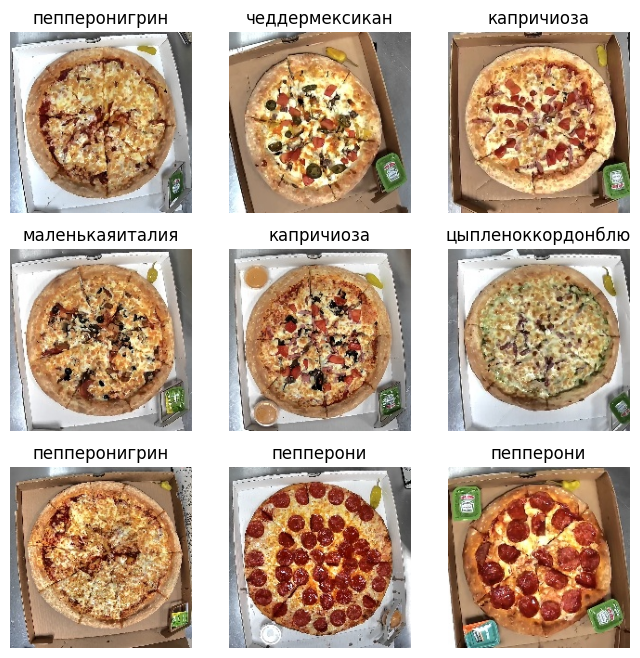

In [34]:
classes = """0: альфредо
1: баварская
2: вегетарианская
3: ветчинаибекон
4: ветчинаигрибы
5: гавайская
6: грушаbbq
7: капричиоза
8: клубникаизефир
9: крем-чизсгрибами
10: любимаядедамороза
11: любимаякарбонара
12: любимаяпапинапицца
13: маленькаяиталия
14: маргарита
15: мексиканская
16: миксгрин
17: мясная
18: мясноебарбекю
19: новогодняя
20: палочки
21: папамикс
22: пепперони
23: пепперонигрин
24: пицца8сыровnew
25: постная
26: рождественская
27: сананасомибеконом
28: сгрушейибеконом
29: сгрушейиголубымсыром
30: сердцепепперони-4сыра
31: сердцецыпленокбарбекю-пепперони
32: сливочнаяскреветками
33: суперпапа
34: сырная
35: томатнаяскреветками
36: улыбка
37: цыпленокбарбекю
38: цыпленокгрин
39: цыпленоккордонблю
40: цыпленокрэнч
41: цыпленокфлорентина
42: чеддермексикан
43: чеддерчизбургер
43: четыресыра
45: чизбургер"""

labels = classes.split()[1::2]
print(labels)
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item() # Случайный индекс из датасета
    img, label = training_data[sample_idx] # Обращение по такому индексу возвращает изображение и метку элемента датасета
    figure.add_subplot(rows, cols, i)
    plt.title(labels[label])
    plt.axis("off")
    plt.imshow(np.moveaxis(img.numpy(),0,-1))
plt.show()

In [43]:
img.numpy().shape

(3, 196, 196)

In [35]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')


Using cpu device


In [36]:
from torchvision.models import resnet50, ResNet50_Weights

weights = ResNet50_Weights.DEFAULT
model = resnet50(weights=weights)#preprocess is also here
model.to(device)
model.train()

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to C:\Users\etern/.cache\torch\hub\checkpoints\resnet50-11ad3fa6.pth
100%|█████████████████████████████████████████████████████████████████████████████| 97.8M/97.8M [00:09<00:00, 10.3MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [37]:
loss_fn = nn.CrossEntropyLoss()

In [38]:
learning_rate = 1e-3
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.8)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, betas=(0.9,0.99))

In [39]:
from tqdm import tqdm
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Получаем предсказания модели для данного батча
        #X, y = generate_cutmix_image(X, y, 1.0)
        pred = model(X)
        # Вычисляем лосс
        loss = loss_fn(pred, y)

        # Backpropagation
        # Обнуляем градиенты
        optimizer.zero_grad()
        # Вычисляем градиент лосса по параметрам модели
        loss.backward()
        # Производим шаг алгоритма оптимизации
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [40]:
def test_loop(dataloader, model, loss_fn, loss_list, acc_list):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y.argmax(1)).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    loss_list.append(test_loss)
    acc_list.append(correct)
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
learning_rate/=10
print(learning_rate)
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.8)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, betas=(0.9,0.99))

In [41]:
loss_list = []
acc_list = []

In [42]:
epochs = 20
for t in tqdm(range(epochs)):
    print(f"Epoch {t+1}\n-------------------------------")
    model.train(True)
    train_loop(train_dataloader, model, loss_fn, optimizer)
    model.train(False)
    test_loop(test_dataloader, model, loss_fn, loss_listmn, acc_listmn)
print("Done!")

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

Epoch 1
-------------------------------
loss: 7.113442  [    0/ 6424]


  0%|                                                                                           | 0/20 [00:47<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
print(max(acc_listmn))
plt.plot(acc_listmn)